In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Flatten, BatchNormalization
import math  
import sklearn.metrics

In [2]:
df = pd.read_csv('d1_with_status_new.csv')
df

,Date,z1_AC1(kW),z1_S1(degC),Status
0,2018-07-01 00:00:00,0.0,27.57,0.0
1,2018-07-01 00:01:00,0.0,27.57,0.0
2,2018-07-01 00:02:00,0.0,27.57,0.0
3,2018-07-01 00:03:00,0.0,27.56,0.0
4,2018-07-01 00:04:00,0.0,27.56,0.0
...,...,...,...,...
101116,2018-09-13 03:42:00,0.0,26.86,0.0
101117,2018-09-13 03:43:00,0.0,26.86,0.0
101118,2018-09-13 03:44:00,0.0,26.86,0.0
101119,2018-09-13 03:45:00,0.0,26.86,0.0


In [3]:
df.drop(columns= ['z1_AC1(kW)'], inplace=True)
df

,Date,z1_S1(degC),Status
0,2018-07-01 00:00:00,27.57,0.0
1,2018-07-01 00:01:00,27.57,0.0
2,2018-07-01 00:02:00,27.57,0.0
3,2018-07-01 00:03:00,27.56,0.0
4,2018-07-01 00:04:00,27.56,0.0
...,...,...,...
101116,2018-09-13 03:42:00,26.86,0.0
101117,2018-09-13 03:43:00,26.86,0.0
101118,2018-09-13 03:44:00,26.86,0.0
101119,2018-09-13 03:45:00,26.86,0.0


In [4]:
df.index = pd.to_datetime(df['Date'], format='%Y.%m.%d %H:%M:%S')
df.drop(['Date'], inplace= True, axis=1)
df[:26]

,z1_S1(degC),Status
Date,,
2018-07-01 00:00:00,27.57,0.0
2018-07-01 00:01:00,27.57,0.0
2018-07-01 00:02:00,27.57,0.0
2018-07-01 00:03:00,27.56,0.0
2018-07-01 00:04:00,27.56,0.0
2018-07-01 00:05:00,27.56,0.0
2018-07-01 00:06:00,27.56,0.0
2018-07-01 00:07:00,27.56,0.0
2018-07-01 00:08:00,27.56,0.0


In [5]:
values = df.values

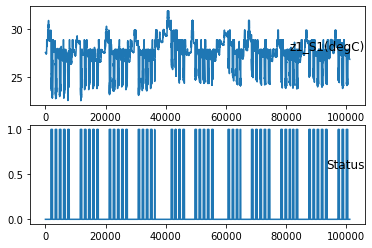

In [6]:
from matplotlib import pyplot
# specify columns to plot
groups = [0, 1]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(df.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [7]:
test_split=round(len(df)*0.30)

In [8]:
test_split

30336

In [9]:
train_df,test_df = df[:-30336], df[-30336:] 

In [10]:
print(train_df.shape)
print(test_df.shape)

(70785, 2)
(30336, 2)


In [11]:
train = train_df
scalers={}
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

C:\Users\azhan\anaconda3\envs\FYP\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\azhan\anaconda3\envs\FYP\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\azhan\anaconda3\envs\FYP\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [12]:
def split_series(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

In [13]:
n_past = 30
n_future = 15 
n_features = 2

In [14]:
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [15]:
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)
#
model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model_e2d2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30, 2)]      0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 30, 100), (N 41200       input_1[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 100), (None, 80400       lstm[0][0]                       
__________________________________________________________________________________________________
repeat_vector (RepeatVector)    (None, 15, 100)      0           lstm_1[0][0]                     
______________________________________________________________________________________________

In [16]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-6 * 0.10 ** x)
model_e2d2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError())
history_e2d2=model_e2d2.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),batch_size=64,verbose=1,callbacks=[reduce_lr])

Epoch 1/50
1106/1106 [==============================] - 24s 16ms/step - loss: 0.4507 - val_loss: 0.3548
Epoch 2/50
1106/1106 [==============================] - 16s 15ms/step - loss: 0.3486 - val_loss: 0.3358
Epoch 3/50
1106/1106 [==============================] - 16s 14ms/step - loss: 0.3376 - val_loss: 0.3340
Epoch 4/50
1106/1106 [==============================] - 16s 14ms/step - loss: 0.3367 - val_loss: 0.3339
Epoch 5/50
1106/1106 [==============================] - 16s 15ms/step - loss: 0.3366 - val_loss: 0.3339
Epoch 6/50
1106/1106 [==============================] - 16s 14ms/step - loss: 0.3366 - val_loss: 0.3339
Epoch 7/50
1106/1106 [==============================] - 16s 14ms/step - loss: 0.3366 - val_loss: 0.3339
Epoch 8/50
1106/1106 [==============================] - 16s 14ms/step - loss: 0.3366 - val_loss: 0.3339
Epoch 9/50
1106/1106 [==============================] - 16s 14ms/step - loss: 0.3366 - val_loss: 0.3339
Epoch 10/50
1106/1106 [==============================] - 15s 14m

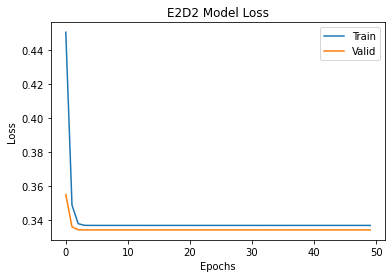

In [17]:
plt.plot(history_e2d2.history['loss'])
plt.plot(history_e2d2.history['val_loss'])
plt.title("E2D2 Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])
plt.show()

In [18]:
pred1_e2d2=model_e2d2.predict(X_test)
pred_e2d2=model_e2d2.predict(X_train)

In [19]:
for index,i in enumerate(train_df.columns):
    scaler = scalers['scaler_'+i]
    
    pred1_e2d2[:,:,index]=scaler.inverse_transform(pred1_e2d2[:,:,index])
    pred_e2d2[:,:,index]=scaler.inverse_transform(pred_e2d2[:,:,index])
    
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])

In [24]:
from sklearn.metrics import mean_absolute_error
 
for index,i in enumerate(train_df.columns):
  print(i)
  for j in range(1,16):
    print("Minute ",j,":")
    print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred1_e2d2[:,j-1,index]))
    print("RMSE-E2D2 : ",sklearn.metrics.mean_squared_error(y_test[:,j-1,index],pred1_e2d2[:,j-1,index]))
  print()

z1_S1(degC)
Minute  1 :
MAE-E2D2 :  0.9113499992891456
RMSE-E2D2 :  1.55992357125722
Minute  2 :
MAE-E2D2 :  0.9051761180797593
RMSE-E2D2 :  1.5170183159204575
Minute  3 :
MAE-E2D2 :  0.8973036307210607
RMSE-E2D2 :  1.4533854351063449
Minute  4 :
MAE-E2D2 :  0.8920541092396477
RMSE-E2D2 :  1.3906284801191506
Minute  5 :
MAE-E2D2 :  0.890868468229827
RMSE-E2D2 :  1.3395121014147753
Minute  6 :
MAE-E2D2 :  0.8941431193400229
RMSE-E2D2 :  1.3025422757674598
Minute  7 :
MAE-E2D2 :  0.9001574623413165
RMSE-E2D2 :  1.2778244146228679
Minute  8 :
MAE-E2D2 :  0.9067644714285956
RMSE-E2D2 :  1.2620030959865747
Minute  9 :
MAE-E2D2 :  0.9125464987342399
RMSE-E2D2 :  1.251906656060043
Minute  10 :
MAE-E2D2 :  0.9166482713171188
RMSE-E2D2 :  1.2451846715675905
Minute  11 :
MAE-E2D2 :  0.919248402828618
RMSE-E2D2 :  1.2403354291648425
Minute  12 :
MAE-E2D2 :  0.9207765967090646
RMSE-E2D2 :  1.2365349653511457
Minute  13 :
MAE-E2D2 :  0.9213962047405136
RMSE-E2D2 :  1.2334302259929424
Minute  14 :
M

In [25]:
 pred_e2d2

array([[[27.46363   ,  0.3699374 ],
        [27.51859   ,  0.3714563 ],
        [27.59671   ,  0.372436  ],
        ...,
        [28.076746  ,  0.3657056 ],
        [28.07941   ,  0.3655305 ],
        [28.078804  ,  0.36549965]],

       [[27.463596  ,  0.3699432 ],
        [27.518587  ,  0.3714621 ],
        [27.596687  ,  0.37244183],
        ...,
        [28.076635  ,  0.36571664],
        [28.079296  ,  0.36554092],
        [28.078709  ,  0.36551008]],

       [[27.46356   ,  0.36994794],
        [27.518549  ,  0.37146628],
        [27.596653  ,  0.37244496],
        ...,
        [28.07664   ,  0.36571726],
        [28.07931   ,  0.3655418 ],
        [28.078724  ,  0.36551115]],

       ...,

       [[27.463882  ,  0.3699338 ],
        [27.518797  ,  0.37144428],
        [27.596884  ,  0.372419  ],
        ...,
        [28.077154  ,  0.36567217],
        [28.07984   ,  0.36549675],
        [28.079254  ,  0.3654636 ]],

       [[27.463865  ,  0.3699358 ],
        [27.518799  ,  0.37

In [29]:
pred_e2d2.shape

(70741, 15, 2)

In [28]:
pred_df = pd.DataFrame(pred_e2d2.tolist(), columns=['Predicted Temperature', 
                      'Predicted Status'])

ValueError: 2 columns passed, passed data had 15 columns